In [10]:
# data => SMSSpamCollection
# location => https://mitu.co.in/dataset

In [11]:
# store this file in your current working directory

In [12]:
import os
os.getcwd()

'/home/mitu/dcnlp'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("SMSSpamCollection", sep = '\t', names = ['label', 'text'])

In [15]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.shape

(5572, 2)

In [5]:
# input variable
x = df['text']

# output variable
y = df['label']

In [17]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [18]:
# data preparation

In [19]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [20]:
sent = "Hello friends! How are you? I like Python Programming."

In [86]:
token1 = word_tokenize(sent)

In [87]:
token1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [88]:
# remove punctuations

In [89]:
tokens2 = [token for token in token1 if token.isalpha()]

In [90]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [91]:
# remove the stopwords

In [92]:
"""import nltk
nltk.download('stopwords')""";

In [93]:
swords = stopwords.words("english")

In [94]:
swords;

In [95]:
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

In [96]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [97]:
# Stemming
ps = PorterStemmer()

In [98]:
tokens4 = [ps.stem(token) for token in tokens3]

In [99]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [100]:
# create a clean text function
def clean_text(sent):
    token1 = wordpunct_tokenize(sent)
    tokens2 = [token for token in token1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4

In [101]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [102]:
sent1 = 'It was nice working with you. Have a great day!'

In [103]:
clean_text(sent1)

['nice', 'work', 'great', 'day']

In [104]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, u, pound, prize, claim...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

##### Explore the data

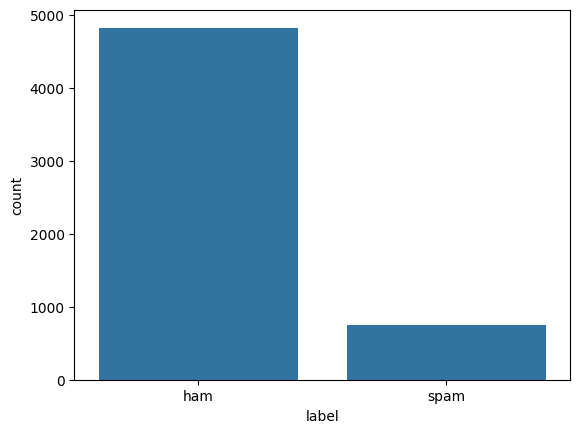

In [105]:
sns.countplot(x = y);

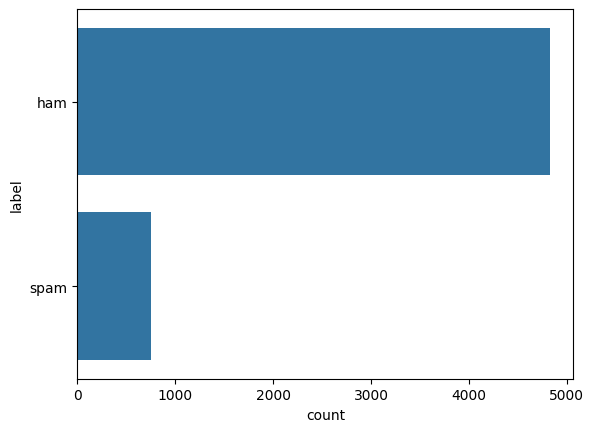

In [106]:
sns.countplot(y = y);

In [107]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

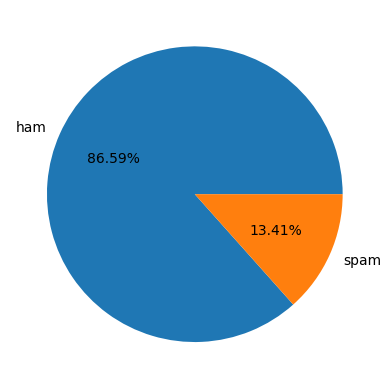

In [108]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [109]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [110]:
spam = x[y == 'spam']

In [111]:
ham = x[y == 'ham']

In [112]:
spam.shape

(747,)

In [113]:
ham.shape

(4825,)

In [114]:
spam_data = ' '.join(list(spam.values))

In [115]:
ham_data = ' '.join(list(ham.values))

In [116]:
from wordcloud import WordCloud

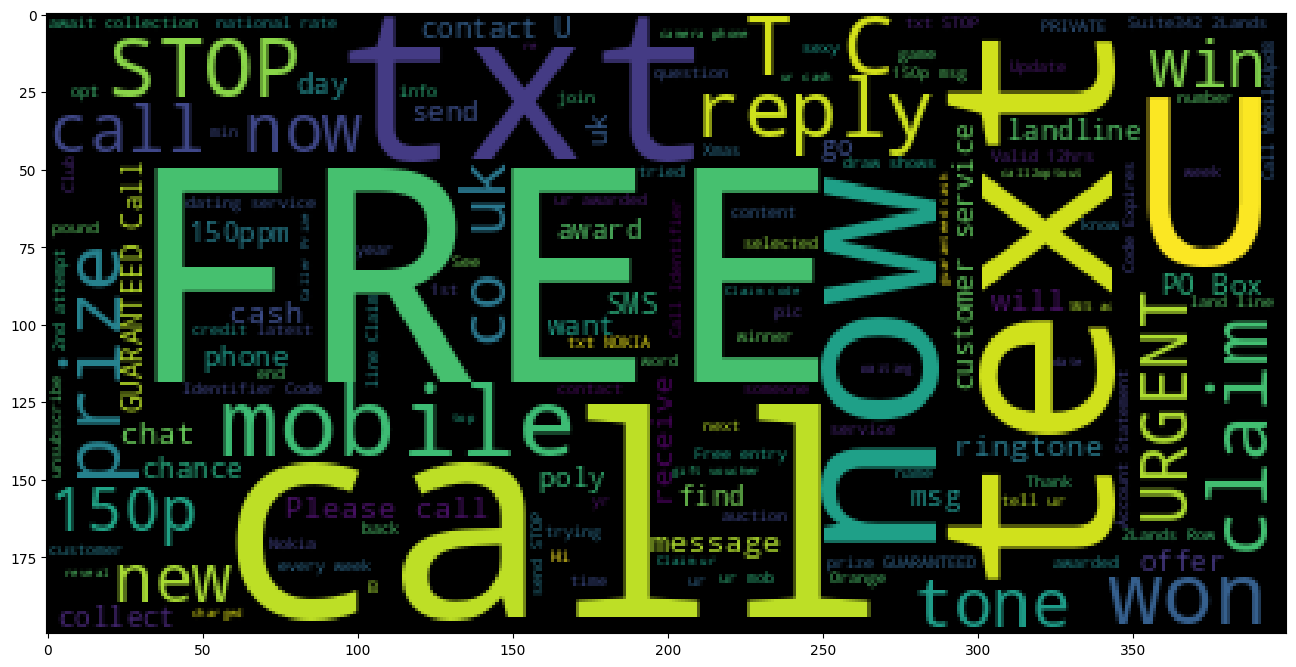

In [117]:
wc_spam = WordCloud().generate(text = spam_data)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

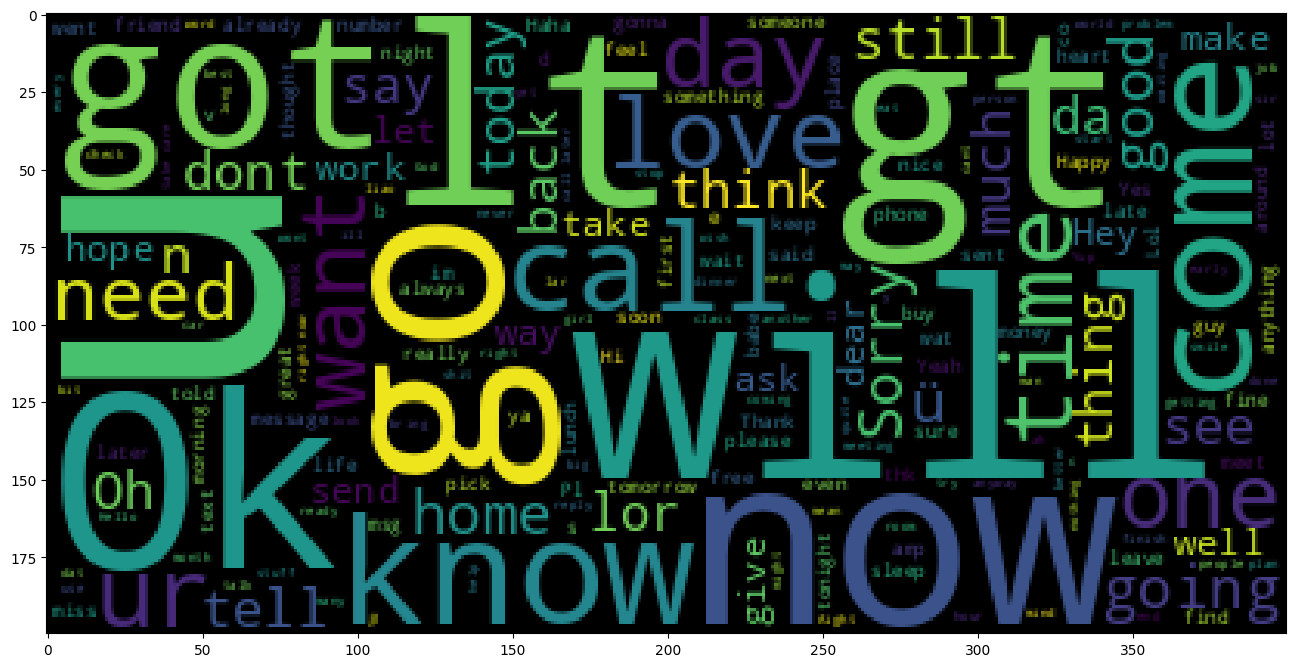

In [118]:
wc_ham = WordCloud().generate(text = ham_data)
plt.figure(figsize=(16,9))
plt.imshow(wc_ham)

##### Prepare the data in numerical and structured form

In [119]:
# count vectorization / bag of words
sentence_1 = 'It is a good practice for us.'
sentence_2 = 'It was also good to know about it.'

In [120]:
# import the class
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
# create the object
cvt = CountVectorizer()

In [122]:
# convert the data
data = cvt.fit_transform([sentence_1, sentence_2])

In [123]:
# create the dataframe
ndf = pd.DataFrame(data.toarray(), columns=cvt.get_feature_names_out())

In [124]:
ndf

,about,also,for,good,is,it,know,practice,to,us,was
0,0,0,1,1,1,1,0,1,0,1,0
1,1,1,0,1,0,2,1,0,1,0,1


##### TF*IDF Vectorization

In [125]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
# create the object
tfidf = TfidfVectorizer(analyzer = clean_text)

In [127]:
# apply the vectorization
x_new = tfidf.fit_transform(x)

In [128]:
x_new.shape

(5572, 6154)

In [129]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'é', 'ü', '鈥'], dtype=object)

##### Build the ML model

In [131]:
# import the class
from sklearn.ensemble import RandomForestClassifier

In [132]:
# create the object
model = RandomForestClassifier(random_state=0)

In [133]:
# train the algorithm
model.fit(x_new, y)

RandomForestClassifier(random_state=0)

##### Prediction on unseen data

In [135]:
sent1 = 'Hello friends! It is my pleasure to meet you.'

In [137]:
sent2 = 'Hi, you got bonus prize of 45000, call us on 565656565.'

In [138]:
model.predict(tfidf.transform([sent1]))

array(['ham'], dtype=object)

In [139]:
model.predict(tfidf.transform([sent2]))

array(['spam'], dtype=object)